# The Inverse Transform

##### Keywords: sampling, inverse transform

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# correction for CDF of exponential distribution
# you should use the following as CDF of exponential distribution with Parameter $\lambda$. The function is given as below

$\begin{equation}
    F(x;\lambda)=
    \begin{cases}
       1 -  e^{-\lambda x}, & \text{if}\ x\geq 0 \\
      0, & \text{otherwise}
    \end{cases}
  \end{equation}$

In [3]:
######################################################################
## CDF for exponential distribution
## with parameter lambda -- from HW02_lab.ipynb
######################################################################
def exp_cdf(arr,lam):
    if( type(arr) != type(np.array([])) ):
        try:
            arr = np.array(arr,dtype=float)
        except:
            print('wrong input for x')
            return np.array([-1])

    return (1 - np.exp( -lam*arr ) )*(arr>0)


## The pdf of exponential distribution with parameter $\lambda$ 

$\begin{equation}
    f(x;\lambda)=
    \begin{cases}
       \lambda e^{-\lambda x}, & \text{if}\ x\geq 0 \\
      0, & \text{otherwise}
    \end{cases}
  \end{equation}$

In [4]:
######################################################################
## probability density function for exponential distribution
## with parameter lambda -- from Lab04.ipynb
######################################################################
def exp_pdf(arr,lam):

    if( type(arr) != type(np.array([])) ):
        try:
            arr = np.array(arr,dtype=float)
        except:
            print('wrong input for arr')
            return np.array([-1])
        
    return lam*np.exp(-lam*arr)*(arr>0)

### Inverse function of CDF of exponential distribution with parameter $\lambda$ for $x\geq0$

$$ u = F(x) = 1-  e^{-\lambda x} $$ 

### Write x as a function of u:
$$ x = -\frac{1}{\lambda}ln\left(1-u\right)$$

### The function above is the inverse function of CDF of exponential distribution


## Here you can use lab04_inversetransform.ipynb as reference to built  inverse samplings for exponential distribution with parameter $\lambda$

1. Define cdf of exponential distributions with parameter $\lambda$ -- This has been done in HW02 -- exp_cdf(arr,lam)

1. Define the inverse function of cdf with parameter $\lambda$ -- invCDF(arr,lam)

1. Define the pdf of exponential distributions with parameter $\lambda$ -- This has been done in Lab04 -- exp_pdf(arr,lam)

1. Let N = 10000, draw N random numbers from uniform distribution U[0,1] and save these numbers into an array: R

1. Use invCDF:  for each lam = 0.5, 1, 1.5, calculate X = invCDF(R,lam) separatly and save them as X1, X2, X3

1. plot $\textit{density}$ histogram of X1 and exp_cdf with lam = 0.5 on the same figure;
1. plot $\textit{density}$ histogram of X2 and exp_cdf with lam = 1 on the same figure;
1. plot $\textit{density}$ histogram of X3 and exp_cdf with lam = 1.5 on the same figure;

1. For X1 only:
    1. Consider aa = np.linspace(1e-5, 3, 200)
    1. For each A in aa, calculate {the number of samples < A}/ total number of samples; Then
     store the result in an array: CDFarr
    1. Draw a dotted plot '.', where x-axis corresponds to aa and y-axis corresponds to CDFarr
    1. Draw a curve with  '-', where x-axis corresponds to aa and y-axis corresponds to exp_CDF(aa,0.5)
    

### Your result should show the three figures sepcified in 6, 7, 8 as the above; And show the figure specified in 9.C and another figure specified in 9.D


In [5]:
######################################################################
## probability density function for exponential distribution
## with parameter lambda -- from Lab04.ipynb
######################################################################
def exp_pdf(arr,lam):

    if( type(arr) != type(np.array([])) ):
        try:
            arr = np.array(arr,dtype=float)
        except:
            print('wrong input for arr')
            return np.array([-1])
        
    return lam*np.exp(-lam*arr)*(arr>0)


######################################################################
## CDF for exponential distribution
## with parameter lambda -- from HW02_lab.ipynb
######################################################################
def exp_cdf(arr,lam):
    if( type(arr) != type(np.array([])) ):
        try:
            arr = np.array(arr,dtype=float)
        except:
            print('wrong input for x')
            return np.array([-1])

    return (1 - np.exp( -lam*arr ) )*(arr>0)

### find inverse function of CDF of exponential distribution with parameter $\lambda$

$$ u = F(x) = 1-  e^{-\lambda x} $$ 

### Write x as a function of u:
$$ x = -\frac{1}{\lambda}ln\left(1-u\right)$$

### The function above is the inverse function of CDF of exponential distribution


In [6]:
######################################################################
## inverse CDF for exponential distribution
## with parameter lambda -- calculation by hand
######################################################################

def invCDF(arr,lam):
    if( type(arr) != type(np.array([])) ):
        try:
            arr = np.array(arr,dtype=float)
        except:
            print('wrong input for x')
            return np.array([])
        
  ######################################################################
  ## All values for arr, need to be between 0 and 1 as these values 
  ## correspond to the value probability 
  ######################################################################    
    if( np.sum(arr<0) + np.sum(arr>=1) > 0 ):
        print('wrong input, should be in [0,1)')
        return np.array([])

    
    return -np.log(1-arr)/lam

In [7]:
######################################################################
## All needed functions are defined, 
## now we can follow lab04_inversetransform.ipynb to plot
######################################################################

## the total number of samples
######################################################################

N = 10000 

## N random numbers from uniform distribution U[0,1]
######################################################################

R = np.random.rand(N)

## Use inverse sampling to generate samples follows exp distribution
##  with parameter lambda
######################################################################

lambdas = [0.5,1,1.5]


## The following plots or plots of histogram goes over 1 are both correct (in different settings), we will discuss it in the next lab

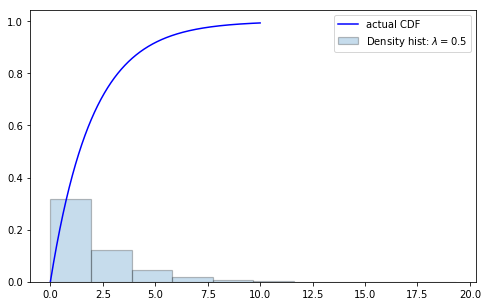

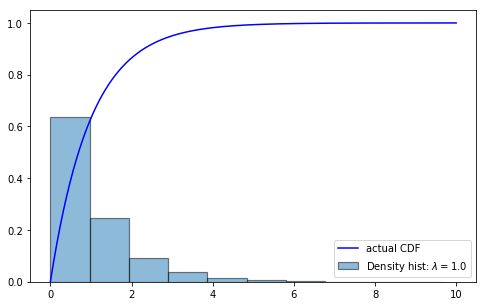

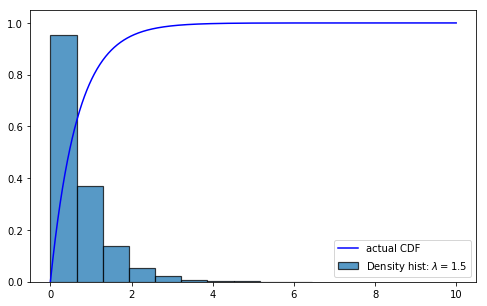

In [8]:
X = []
for lam in lambdas:
    X.append(invCDF(R,lam))

## plot  densitydensity  histogram
######################################################################

xvals=np.linspace(1e-5, 10, 1000)


for i in range(0,3):
    plt.figure(figsize=(8,5))
    lam = lambdas[i]
    plt.hist(X[i],  normed=1,#bins = 50 ,
             label=u"Density hist: $\lambda = %.1f$"%lam, 
             edgecolor='black', linewidth=1.2,alpha = lam/2);
    plt.plot(xvals, exp_cdf(xvals,lam), 'b', 
             label=u'actual CDF')

    plt.legend()
    plt.show()

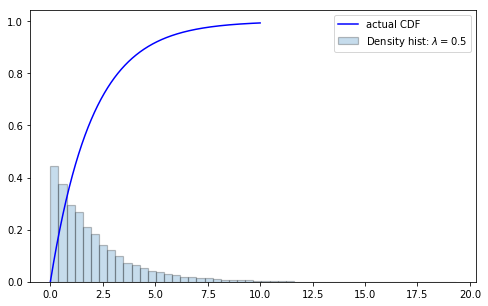

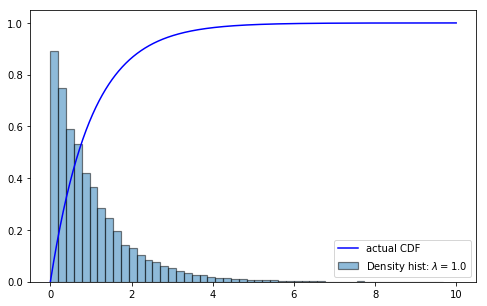

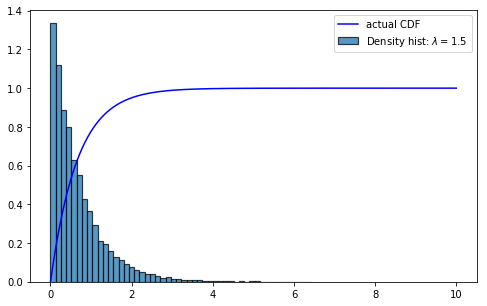

In [9]:
X = []
for lam in lambdas:
    X.append(invCDF(R,lam))

## plot  densitydensity  histogram
######################################################################

xvals=np.linspace(1e-5, 10, 1000)


for i in range(0,3):
    plt.figure(figsize=(8,5))
    lam = lambdas[i]
    plt.hist(X[i],  normed=1,bins = 50 ,
             label=u"Density hist: $\lambda = %.1f$"%lam, 
             edgecolor='black', linewidth=1.2,alpha = lam/2);
    plt.plot(xvals, exp_cdf(xvals,lam), 'b', 
             label=u'actual CDF')

    plt.legend()
    plt.show()

In [10]:
# We consider the following array of values a --200 of them
aa = np.linspace(1e-5, 5, 200)

#for each number A in a, 
# we want to calculate the number of samples < A / total number of samples
# store the result in CDFarr

CDFarr = np.zeros(len(aa))

# for the case X1
X = X[0]
for i in range(0,len(aa)):
    A = aa[i]
    total     = np.sum(X<A)
    prob_A    = total/len(X)
    CDFarr[i] = prob_A
    



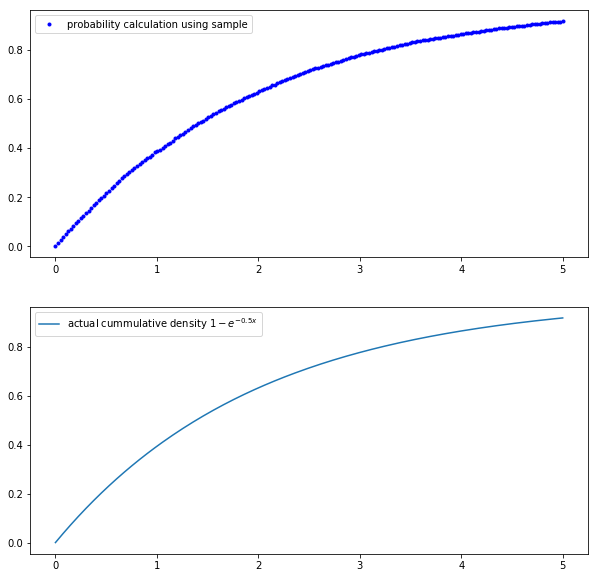

In [13]:
# plot CDF of exp distribution with parameter 0.5

plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(aa,CDFarr,'.',color = 'blue',
         label = u'probability calculation using sample')
plt.legend()

plt.subplot(212)
plt.plot(aa,exp_cdf(aa,0.5),'-',
        label = u'actual cummulative density $1-e^{-0.5x}$')
plt.legend()

plt.show()